**<h1 align="center"> #3 Exploratory Data Analysis - Retail (SampleSuperstore-dataset) </h1>**
## Kamal ADDI

Exploratory Data Analysis - Retail:
    
   ● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

   ● As a business manager, try to find out the weak areas where you can work to make more profit.

   ● What all business problems you can derive by exploring the data?

   ● Dataset: https://bit.ly/3i4rbWl

## I-Importing libraries & loading dataset :

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
data = pd.read_csv("./data/SampleSuperstore.csv")

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Lets check if there are any missing values in our data :

In [5]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no missing values. Hence we can go exploratory analysis part directly.

In [6]:
#row,column count of data
data.shape

(9994, 13)

In [7]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

Clearly the data is for United States country only, so we can drop the 'Country' column as we dont need any analysis to be done based on it.

In [8]:
#dropping Country column
data=data.drop('Country',axis=1)
data.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
#row,column count of data
data.shape

(9994, 12)

## II-Exploratory Analysis :

Lets look at the product categories available in our data :

In [10]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

There are 3 categories in our data : 'Furniture', 'Office Supplies' and 'Technology'.

In [11]:
# number of products in each category 
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

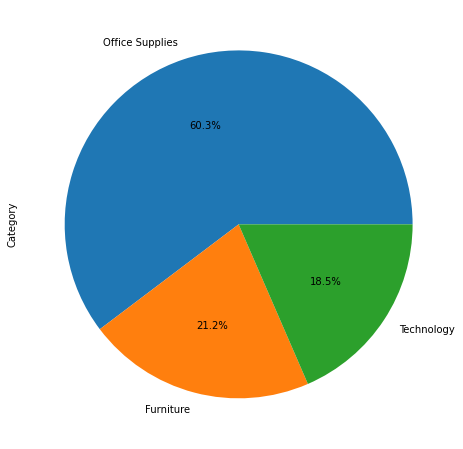

In [16]:
# plot of products in each category
plt.figure(figsize=(10,8))
data['Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [14]:
#number of products in each sub-category
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

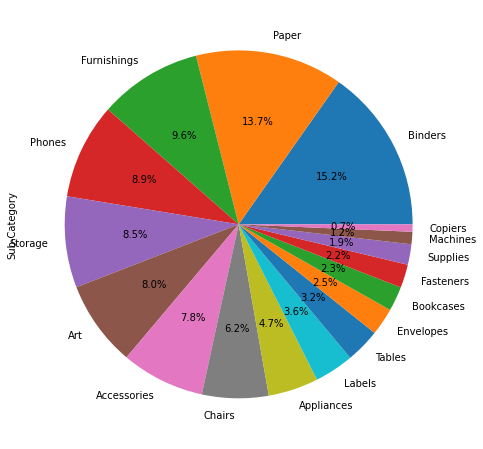

In [17]:
# plot of products in each sub-category
plt.figure(figsize=(10,8))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

Total Profit and Sales per Sub-Category :

<ipython-input-122-de857439d9a6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(16,10))


<Figure size 576x432 with 0 Axes>

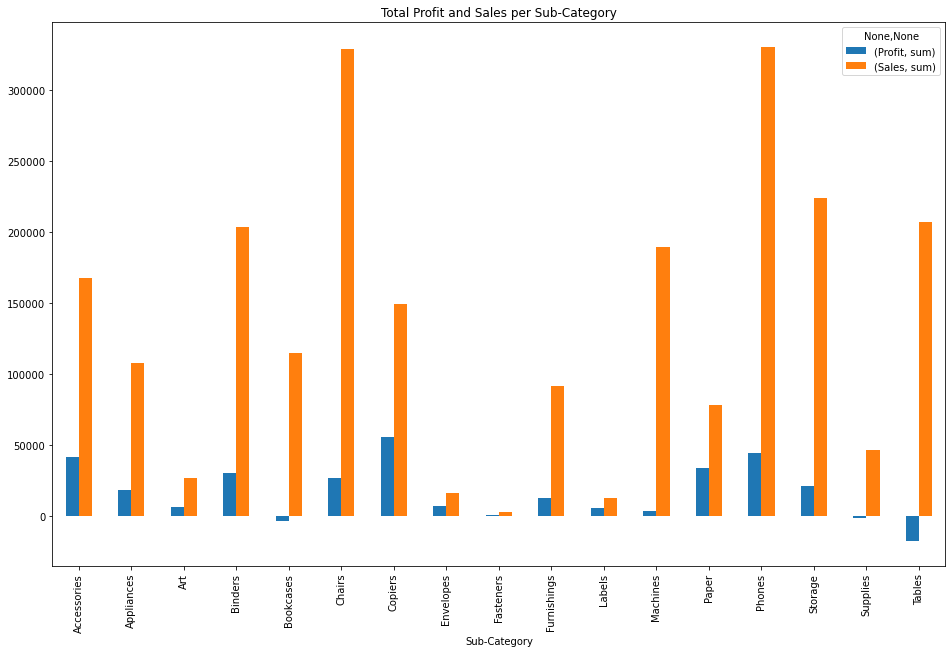

In [122]:
plt.figure(figsize=(8,6))
data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(16,10))
plt.title('Total Profit and Sales per Sub-Category')
plt.show();

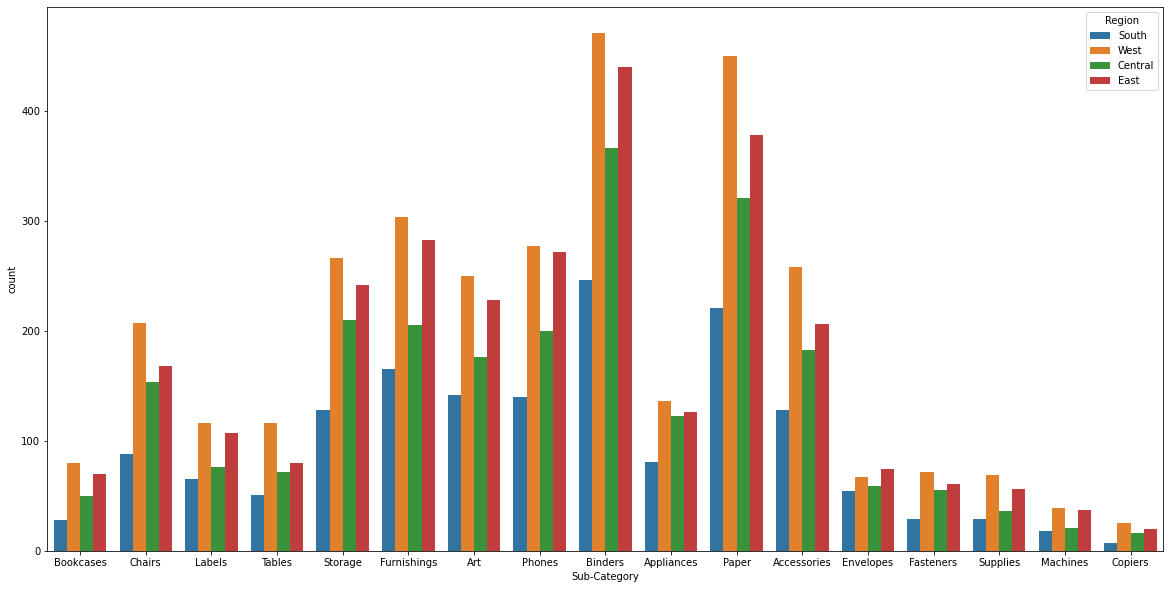

In [37]:
#Count of Sub-Category region wise
plt.figure(figsize=(20,10))
sns.countplot(x="Sub-Category", hue="Region", data=data)
plt.show()

People residing in Western part of US tend to order more from superstore.

## The weak areas where we can work to make more profit ?

Checking the Profit based on the Region :

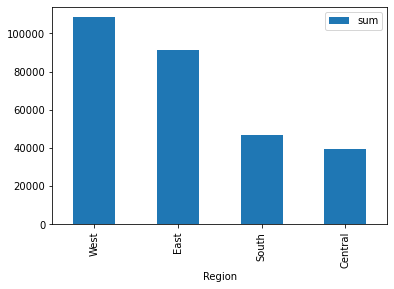

In [121]:
data.groupby('Region')['Profit'].agg(['sum']).sort_values(['sum'], ascending=False).plot.bar()

#### The Profit is maximum in the Western Region of the country and minimum in the Central Region of the country.

We now move on to checking the Profit earned in each the State :

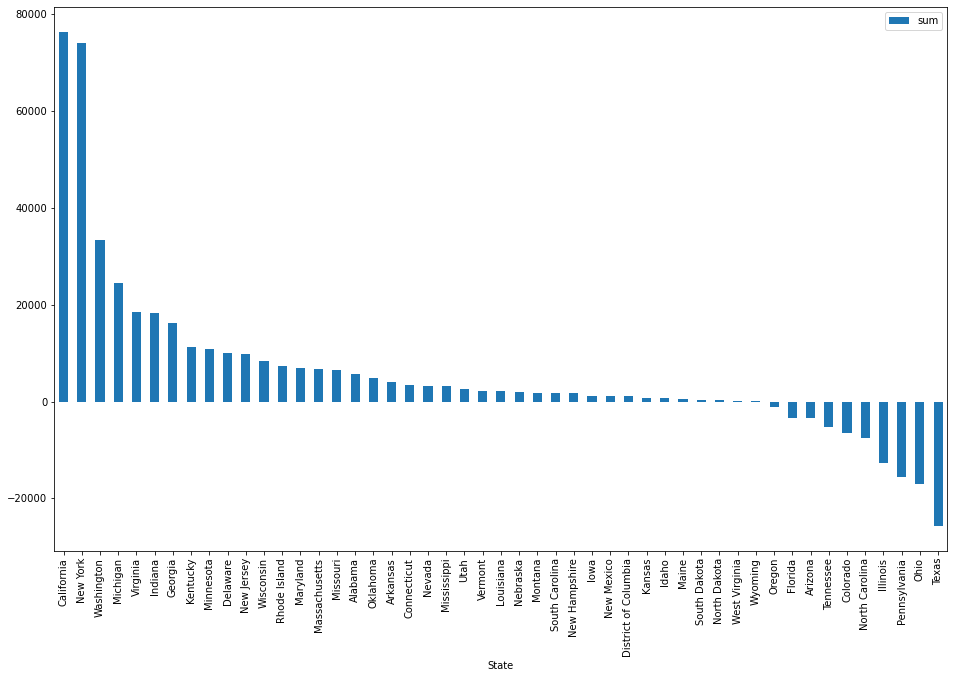

In [127]:
data.groupby('State')['Profit'].agg(['sum']).sort_values(['sum'], 
                                                         ascending=False).plot.bar(figsize=(16,10));

#### We can see that the maximum profits comes from the State of California followed by New York. And the minimum profits comes from the States of Texas followed by Ohio and Pensylvania.

Top 10 cities in US with high profits sum :

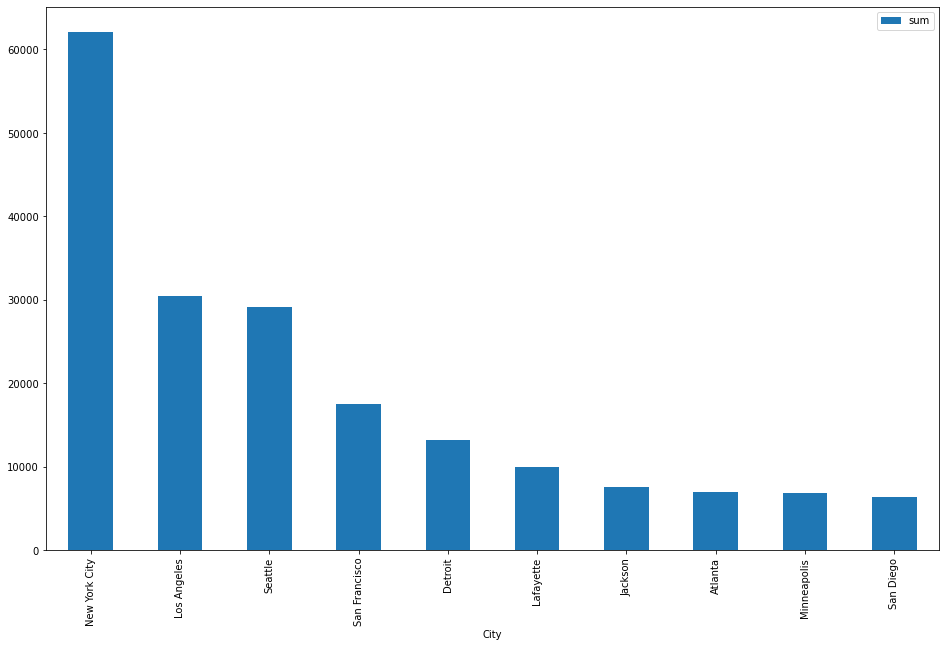

In [134]:
data.groupby('City')['Profit'].agg(['sum']).sort_values(['sum'], 
                                                         ascending=False)[:10].plot.bar(figsize=(16,10));

#### The maximum profits in all the Cities comes from the New York City followed by Los Angeles and Seattle.

Top 10 non profitable cities in US :

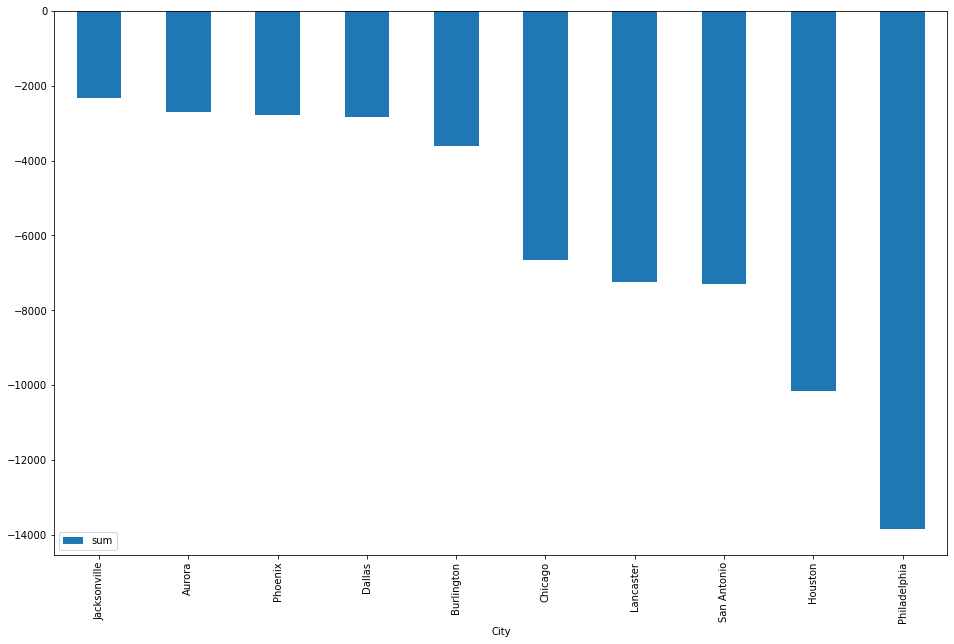

In [137]:
data.groupby('City')['Profit'].agg(['sum']).sort_values(['sum'], 
                                                         ascending=False)[521:].plot.bar(figsize=(16,10));

#### The minimum profits in all the Cities comes from Philadelphia followed by Houston City.

## Total Profit VS Sub Category

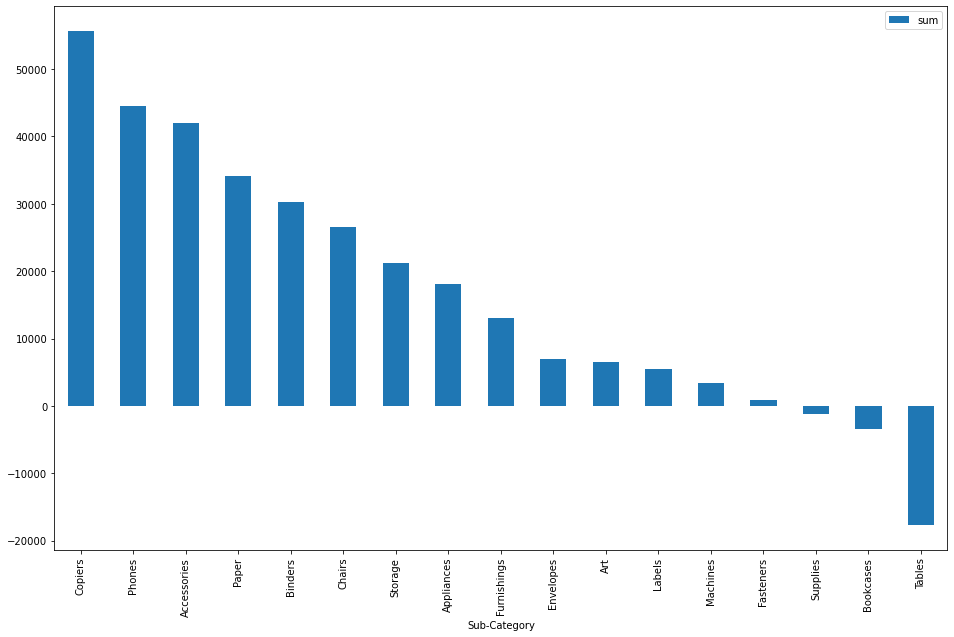

In [144]:
data.groupby('Sub-Category')['Profit'].agg(['sum']).sort_values(['sum'], 
                                                         ascending=False).plot.bar(figsize=(16,10));

#### The maximum profit was earned by selling the copiers and the highest losses are incurred in selling the Tables, Bookcases and Supplies respectively.

## Profit VS Shipping Mode

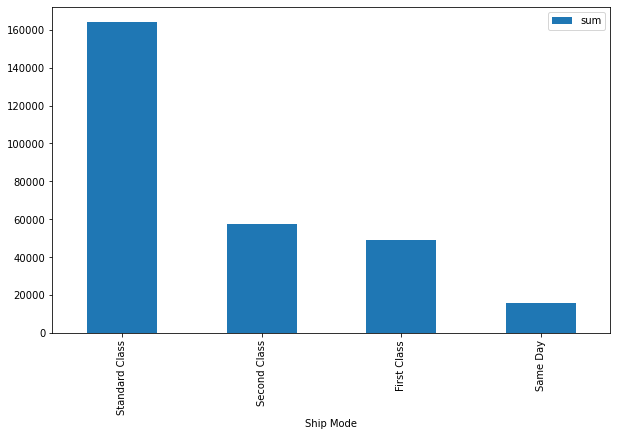

In [146]:
data.groupby('Ship Mode')['Profit'].agg(['sum']).sort_values(['sum'], 
                                                         ascending=False).plot.bar(figsize=(10,6));

#### This shows that the Standard Shipping is the most profitable Shipping Mode in all the Categories (>160 000).

## Profit in Each Segment

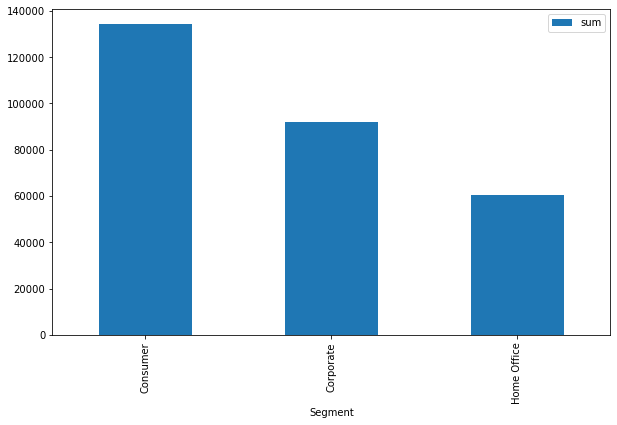

In [147]:
data.groupby('Segment')['Profit'].agg(['sum']).sort_values(['sum'], 
                                                         ascending=False).plot.bar(figsize=(10,6));

#### The most profitable Segment is Consumers followed by Corporate and Home Office.

## Profit VS Category

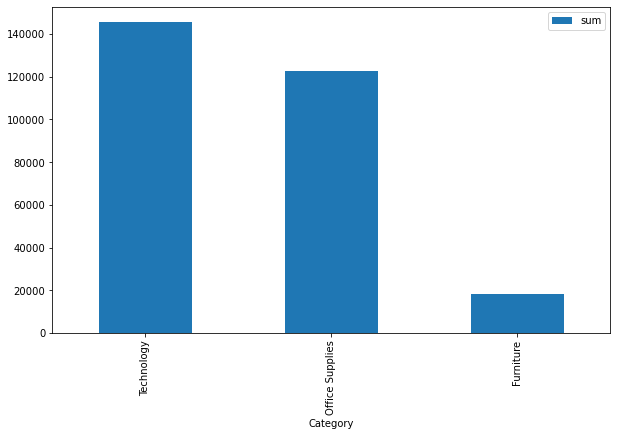

In [148]:
data.groupby('Category')['Profit'].agg(['sum']).sort_values(['sum'], 
                                                         ascending=False).plot.bar(figsize=(10,6));

#### We can see that the Technology is the most profitable category, followed by Office Supplies and Furniture.

                                        ## end